In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, NuSVC
from sklearn.tree import DecisionTreeClassifier

from models import ml_functions, seed
from models.data_tools import DataGenerator
from models.data_vis import (PostProcessing, RawVisualization,
                             TimeFeatureVisualization)
from models.libs.logger import logger


In [5]:
{
    "tags": [
        "hide-input",
    ]
}

data_generator = DataGenerator()
df_data = data_generator.run()
df_data

,maximum,minimum,mean,standard_deviation,rms,skewness,kurtosis,form_factor,crest_factor,fault
0,3.708878,-4.110280,-0.126366,0.880332,0.889333,0.016243,0.076451,-7.037751,4.170403,normal
1,3.260910,-4.038106,-0.146357,0.887748,0.899709,0.003125,0.000151,-6.147378,3.624405,normal
2,3.200882,-3.673018,-0.135750,0.863550,0.874133,-0.028401,0.021853,-6.439290,3.661780,normal
3,3.235745,-3.632028,-0.125477,0.865634,0.874659,0.028933,0.023337,-6.970649,3.699436,normal
4,3.021501,-4.000500,-0.149486,0.885329,0.897839,0.007603,0.035595,-6.006153,3.365305,normal
...,...,...,...,...,...,...,...,...,...,...
369,23.025190,-20.523490,-0.198981,1.963862,1.973817,0.888894,29.402796,-9.919628,11.665311,inner race
370,22.618700,-23.191720,-0.196386,2.001058,2.010570,0.485242,35.869763,-10.237836,11.249894,inner race
371,21.838440,-21.146950,-0.188544,1.971891,1.980784,0.483278,34.473224,-10.505694,11.025148,inner race
372,0.760301,-1.077655,-0.080723,0.573646,0.546830,-0.336532,-1.205193,-6.774132,1.390379,inner race


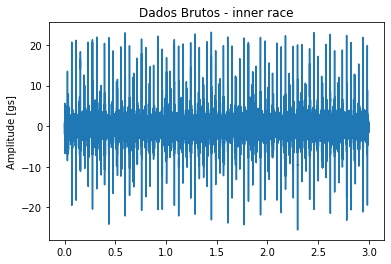

In [6]:
raw_data = data_generator.data
fault = data_generator.fault
RawVisualization(raw_data, fault).plt_raw_data()

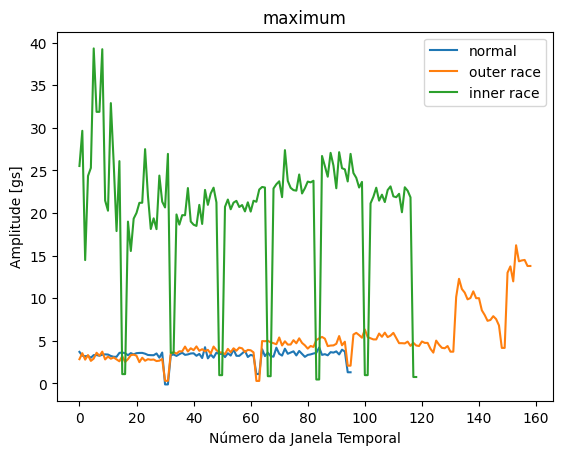

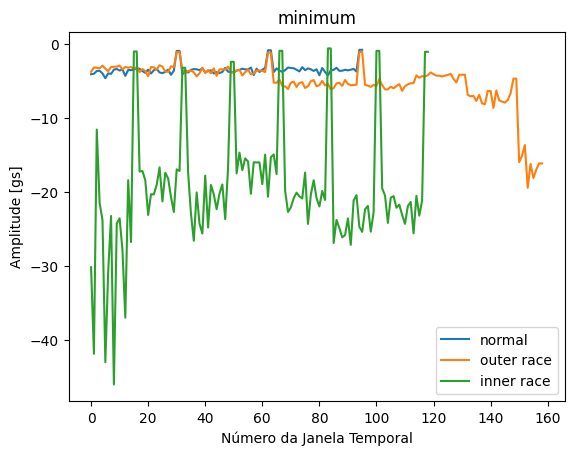

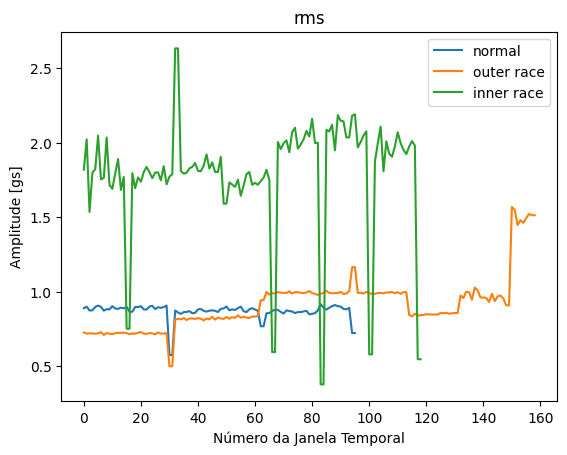

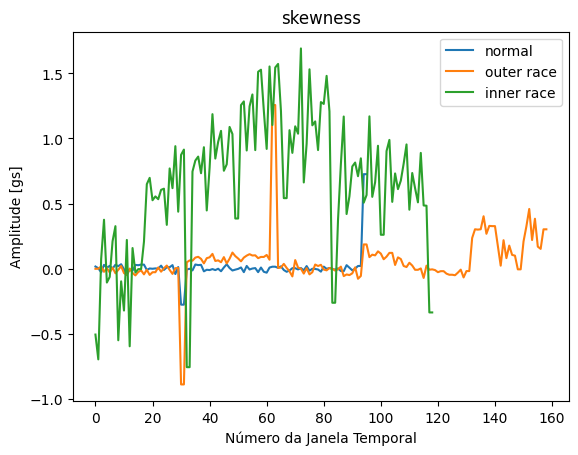

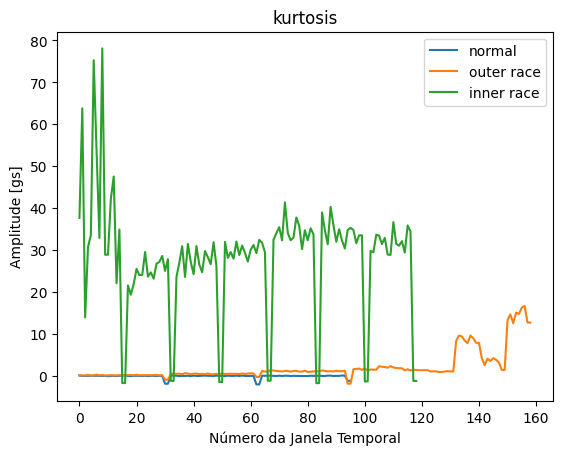

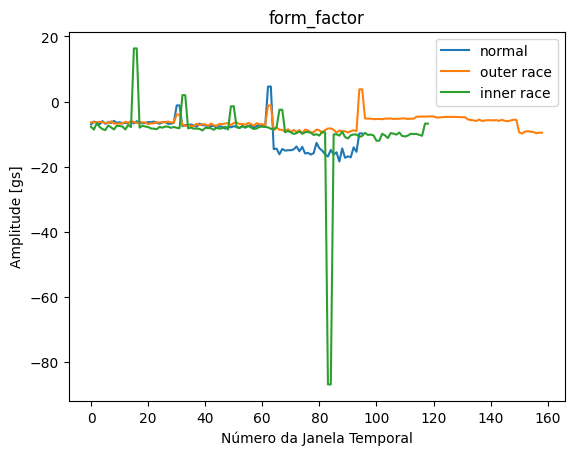

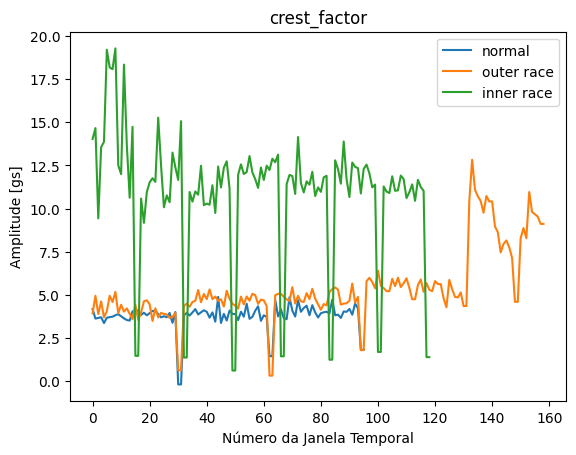

In [32]:
time_feature_visualization = TimeFeatureVisualization(df_data)
time_feature_visualization.plot_all()

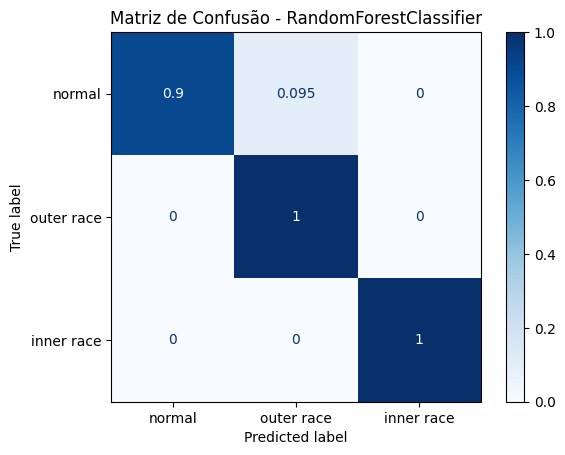

In [33]:
score = {}
classifier = ml_functions.Classifier(data = df_data, classifier=RandomForestClassifier, random_state = seed)
classifier.run()
score[f"{classifier.classifier.__class__.__name__}"] = round(classifier.score * 100,2)
PostProcessing(classifier, method_name = classifier.classifier.__class__.__name__).plot_confusion_matrix()

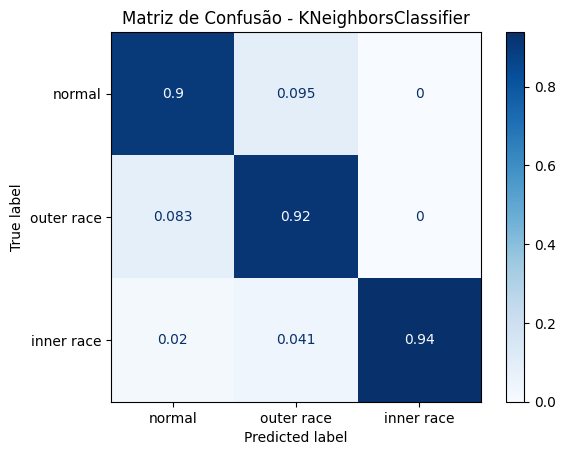

In [34]:
    classifier = ml_functions.Classifier(data = df_data, classifier=KNeighborsClassifier)
    classifier.run()
    score[f"{classifier.classifier.__class__.__name__}"] = round(classifier.score * 100,2)
    PostProcessing(classifier, method_name = classifier.classifier.__class__.__name__).plot_confusion_matrix()

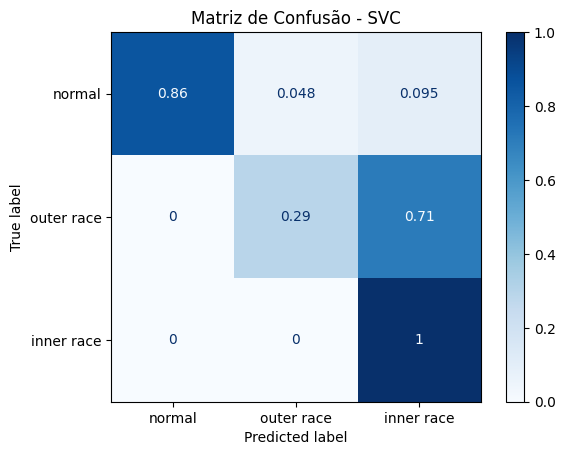

In [35]:
classifier = ml_functions.Classifier(data = df_data, classifier=SVC, random_state = seed)
classifier.run()
score[f"{classifier.classifier.__class__.__name__}"] = round(classifier.score * 100,2)
PostProcessing(classifier, method_name = classifier.classifier.__class__.__name__).plot_confusion_matrix()

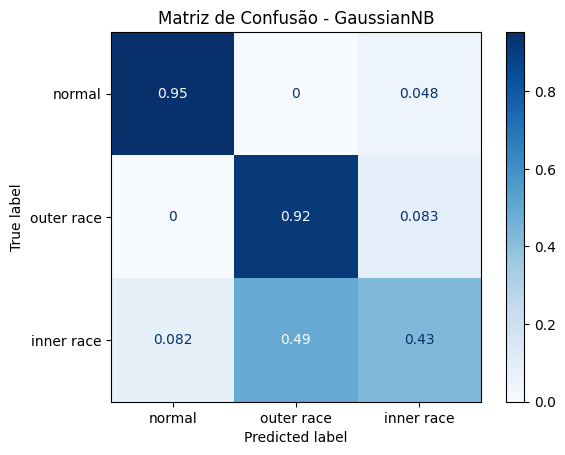

In [36]:
classifier = ml_functions.Classifier(data = df_data, classifier=GaussianNB)
classifier.run()
score[f"{classifier.classifier.__class__.__name__}"] = round(classifier.score * 100,2)
PostProcessing(classifier, method_name = classifier.classifier.__class__.__name__).plot_confusion_matrix()

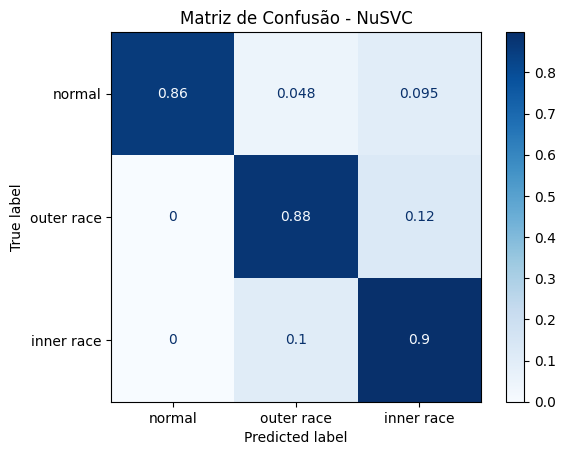

In [37]:
classifier = ml_functions.Classifier(data = df_data, classifier=NuSVC, random_state = seed)
classifier.run()
score[f"{classifier.classifier.__class__.__name__}"] = round(classifier.score * 100,2)
PostProcessing(classifier, method_name = classifier.classifier.__class__.__name__).plot_confusion_matrix()

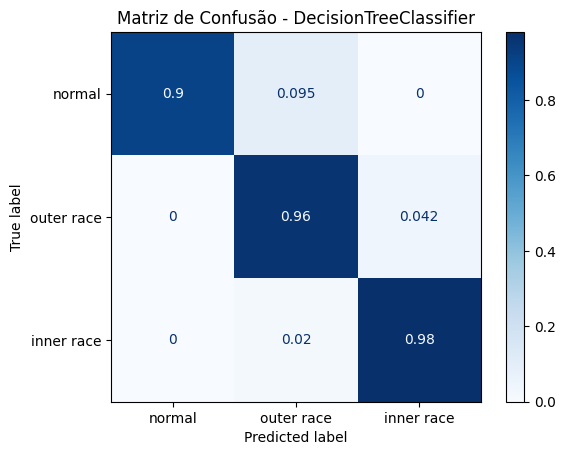

In [38]:
classifier = ml_functions.Classifier(data = df_data, classifier=DecisionTreeClassifier, criterion = "entropy")
classifier.run()
score[f"{classifier.classifier.__class__.__name__}, "] = round(classifier.score * 100,2)
PostProcessing(classifier, method_name = classifier.classifier.__class__.__name__).plot_confusion_matrix()


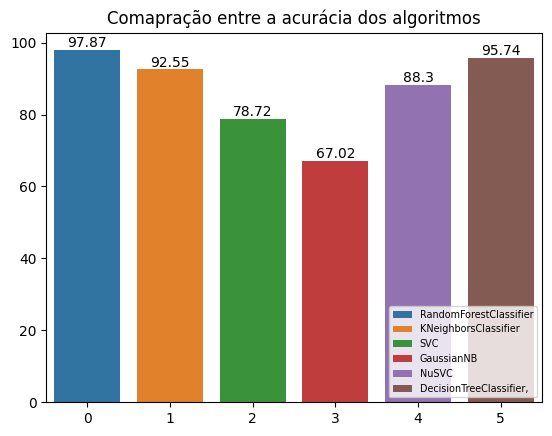

In [39]:
PostProcessing.plot_score(score)